# wine quality prediction using random forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#load dataset
wine_data=pd.read_csv("wineQT.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#getting the number of rows and columns
wine_data.shape

(1143, 13)

In [4]:
#getting the columns name
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
#checking for missing values
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# data analysis and visualization

In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


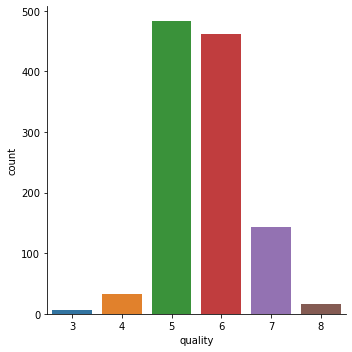

In [10]:
#number of values for each quality
#we can either use the catplot or the countplot since the output is the same
sns.catplot(x="quality",data=wine_data,kind='count')

<AxesSubplot:xlabel='quality', ylabel='count'>

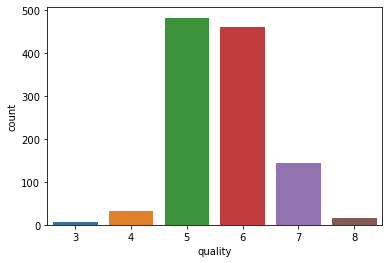

In [11]:
#work similary as the catplot
sns.countplot(x="quality",data=wine_data)#output shows the quality and volatile is inversely prportional

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

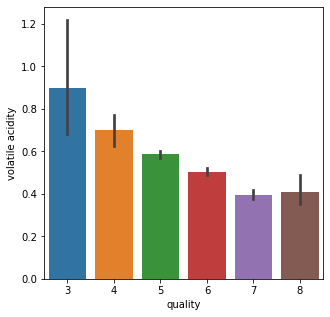

In [12]:
#more analysis to identify which values are more related with the quality therefore we will compare all the values with the quality
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=wine_data)


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

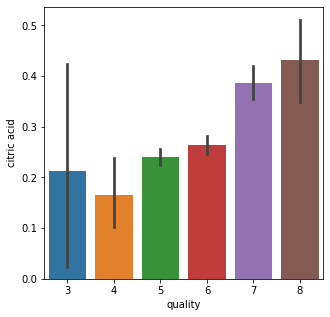

In [13]:
#citric vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="citric acid",data=wine_data)#the output shows taht the citric and quality are directly proportional


# CORRELATION


<AxesSubplot:>

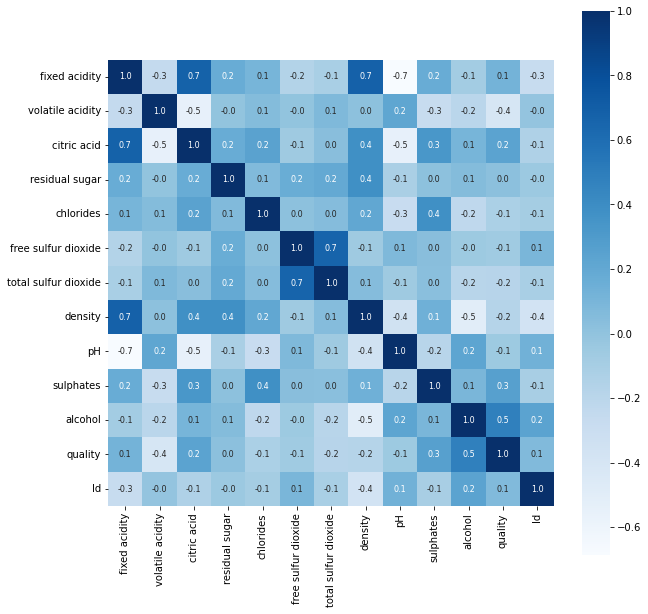

In [14]:
correlation=wine_data.corr()
#constructing a heatmap to understand the correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")
#the output shows that the fixed acidity,citric acid,sulphate and acohol are highly correlated

# DATA PREPROCESSING

In [16]:
#seperate the data and the label
x=wine_data.drop(['quality','Id'],axis=1)

In [17]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


LABEL BINARIZATION

In [18]:
#binarizing the labels into two quality values
y=wine_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [19]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


In [20]:
#spliting dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
#y.shape is the original data,y_train.shape is training data,y_test is the testing data
print(y.shape,y_train.shape,y_test.shape)

(1143,) (914,) (229,)


# MODEL TRAINING:RANDOMFOREST CLASSIFIER


In [22]:
model=RandomForestClassifier()

In [23]:
#fiting the model
#x_train is all the training data,y_train is labels for the training  data
model.fit(x_train,y_train)

RandomForestClassifier()

# MODEL EVALUATION


In [24]:
pred=model.predict(x_test)
test=accuracy_score(pred,y_test)
print("accuracy",test)

accuracy 0.9126637554585153


# Building a predictive model

In [25]:
input_data=(7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4)
#changing input data into numpy array
convert=np.asarray(input_data)
#reshaping data as we are predicting the label for one instance
reshaping=convert.reshape(1,-1)
prediction=model.predict(reshaping)
print(prediction)
if(prediction[0]==1):
    print("good quality wine")
else:
    print("poor quality wine")
    


[0]
poor quality wine
